# Outlier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape

(302, 14)

In [10]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Outlier

<Axes: >

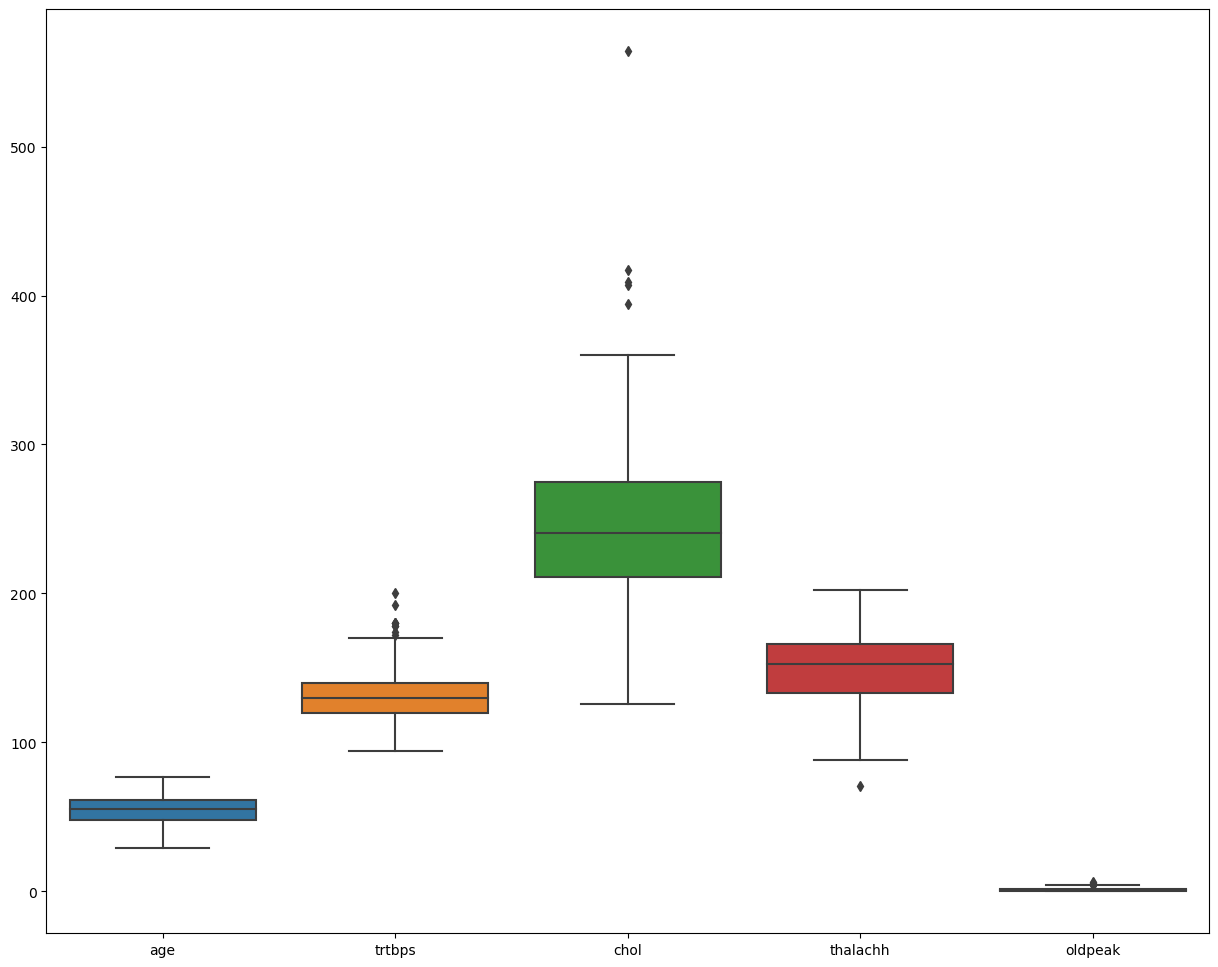

In [12]:
# Checking for the presence of outliers in numeric cols ('age','trtbps','chol','thalachh','oldpeak')

plt.figure(figsize=(15,12))
sns.boxplot(data=df[['age','trtbps','chol','thalachh','oldpeak']])

In [ ]:
#Finding values of outliers(IQR method)
# 1. Sort the dataset in ascending order,
# 2 calculate the 1st and 3rd quartiles(Q1, Q3)
# 3  compute IQR=Q3-Q1,
# 4 compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR),
# 5 loop through the values of the dataset and check for those who fall below the lower bound 
#and above the upper bound and mark them as outliers

In [15]:
def detect_outliers_iqr(data):
    outlier_list=[]
    data=sorted(data)
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    
    IQR=q3-q1
    lwr_bound=q1-(1.5*IQR)
    upr_bound=q3+(1.5*IQR)
    
    for i in data:
        if(i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list

for i in ['age','trtbps','chol','thalachh','oldpeak']:
    outliers=detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : []
Outliers in trtbps attribute : [172, 174, 178, 178, 180, 180, 180, 192, 200]
Outliers in chol attribute : [394, 407, 409, 417, 564]
Outliers in thalachh attribute : [71]
Outliers in oldpeak attribute : [4.2, 4.2, 4.4, 5.6, 6.2]


In [21]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):
    
    tenth_percentile=np.percentile(data,10)
    ninetieth_percentile=np.percentile(data,90)
    
    print('10th, tenth_percentile', tenth_percentile)
    print('90th, ninetieth_percentile', ninetieth_percentile)
    
    b=np.where(data<tenth_percentile, tenth_percentile, data)
    
    b1=np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1

for i in ['trtbps','chol','thalachh','oldpeak']:
    df[i]=handle_outliers(df[i])
    print(df[i])

10th, tenth_percentile 110.0
90th, ninetieth_percentile 152.0
0      145.0
1      130.0
2      130.0
3      120.0
4      120.0
       ...  
297    140.0
298    110.0
299    144.0
300    130.0
301    130.0
Name: trtbps, Length: 302, dtype: float64
10th, tenth_percentile 188.4
90th, ninetieth_percentile 308.7290000000001
0      233.000
1      250.000
2      204.000
3      236.000
4      308.729
        ...   
297    241.000
298    264.000
299    193.000
300    188.400
301    236.000
Name: chol, Length: 302, dtype: float64
10th, tenth_percentile 116.0
90th, ninetieth_percentile 176.45800000000017
0      150.000
1      176.458
2      172.000
3      176.458
4      163.000
        ...   
297    123.000
298    132.000
299    141.000
300    116.000
301    174.000
Name: thalachh, Length: 302, dtype: float64
10th, tenth_percentile 0.0
90th, ninetieth_percentile 2.8
0      2.3
1      2.8
2      1.4
3      0.8
4      0.6
      ... 
297    0.2
298    1.2
299    2.8
300    1.2
301    0.0
Name: oldpe

<Axes: >

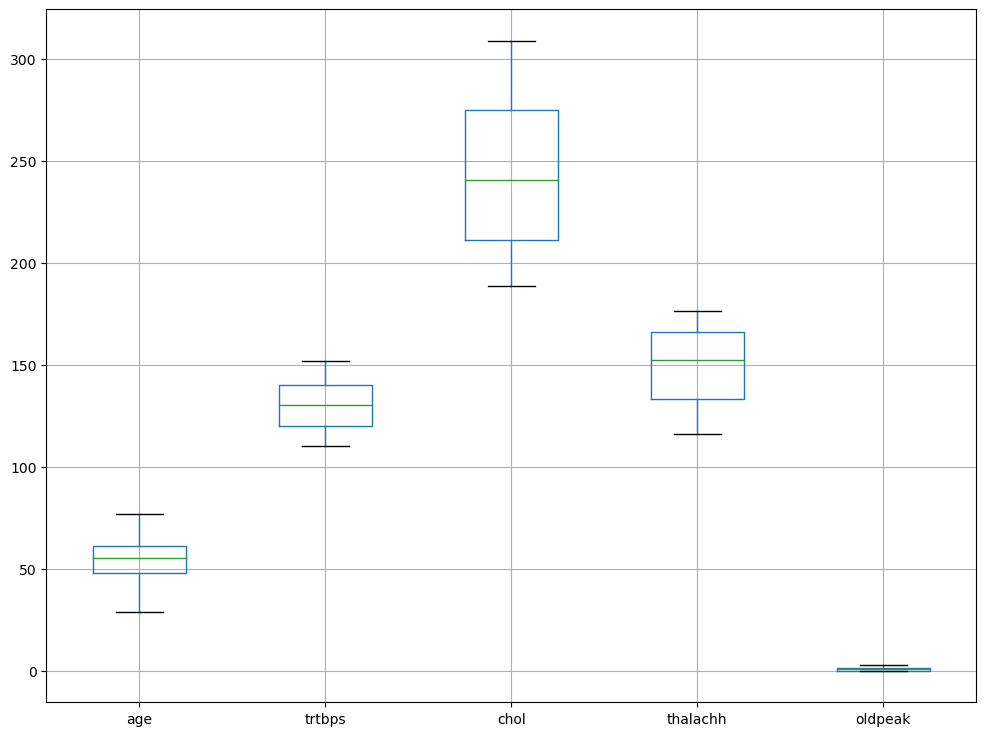

In [22]:
plt.figure(figsize=(12,9))
df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak'])

<Axes: >

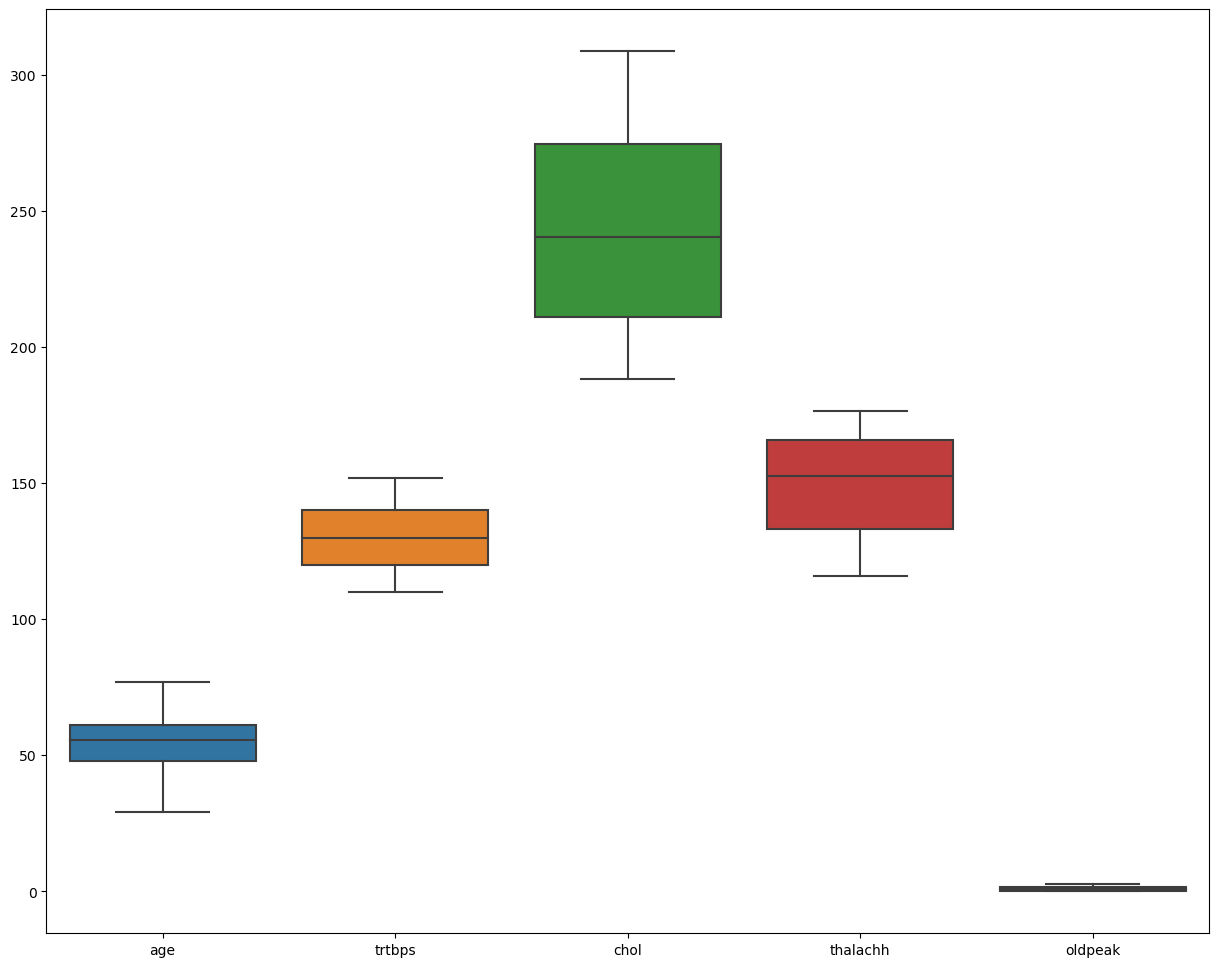

In [23]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df[['age','trtbps','chol','thalachh','oldpeak']])